<a href="https://colab.research.google.com/github/PareesaK/Microsoft-Malware-Detection-Predictive-Machine-Learning-Model/blob/main/creditcard_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data & Libraries


In [4]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import data
df = pd.read_csv("/content/drive/MyDrive/ADS505_FinalProject/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Basic Data Information

In [6]:
#get shape
df.shape

(284807, 31)

In [7]:
#are there duplicates?
df.duplicated().sum()

1081

In [8]:
#get datatypes
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [9]:
# is there class imbalance?
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<Axes: xlabel='Class', ylabel='count'>

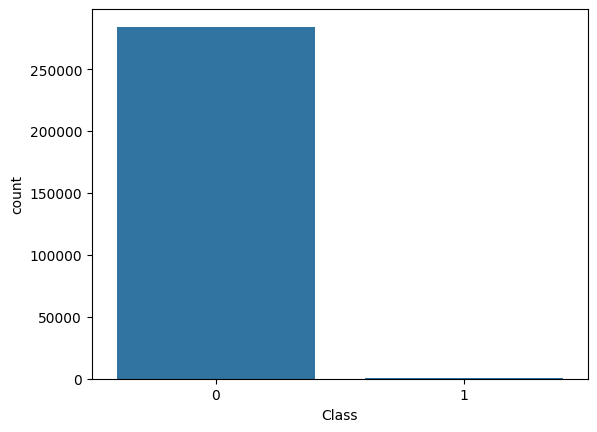

In [10]:
sns.countplot(x='Class', data=df)

In [11]:
#percentage of binary class
print("percentage of each class", df['Class'].value_counts()/len(df)*100)

percentage of each class Class
0    99.827251
1     0.172749
Name: count, dtype: float64


# Data Quality Report

## Continuous Features

In [12]:
# identify continuous features
conf = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
conf

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [13]:
#identify any columns to filter out from the "continuous features"
conf_exclude = []
filter_conf = [x for x in conf if x not in conf_exclude]
filter_conf

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [14]:
#get summary stats on continuous
df[filter_conf].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
pd.options.display.float_format = '{:.3f}'.format #ensures that the formatting will be more readable.

data_quality_conf = pd.DataFrame({
    'Feature': filter_conf,
    'Count': df[filter_conf].count().values,
    'Missing Values': df[filter_conf].isnull().sum().values,
    'Cardinality': df[filter_conf].nunique().values,
    'Min': df[filter_conf].min().values,
    '1st Quartile': df[filter_conf].quantile(0.25).values,
    'Mean': df[filter_conf].mean().values,
    'Median': df[filter_conf].median().values,
    '3rd Quartile': df[filter_conf].quantile(0.75).values,
    'Max': df[filter_conf].max().values,
    'Standard Deviation': df[filter_conf].std().values,
})
data_quality_conf

,Feature,Count,Missing Values,Cardinality,Min,1st Quartile,Mean,Median,3rd Quartile,Max,Standard Deviation
0,Time,284807,0,124592,0.000,54201.500,94813.860,84692.000,139320.500,172792.000,47488.146
1,V1,284807,0,275663,-56.408,-0.920,0.000,0.018,1.316,2.455,1.959
2,V2,284807,0,275663,-72.716,-0.599,0.000,0.065,0.804,22.058,1.651
3,V3,284807,0,275663,-48.326,-0.890,-0.000,0.180,1.027,9.383,1.516
4,V4,284807,0,275663,-5.683,-0.849,0.000,-0.020,0.743,16.875,1.416
5,V5,284807,0,275663,-113.743,-0.692,0.000,-0.054,0.612,34.802,1.380
6,V6,284807,0,275663,-26.161,-0.768,0.000,-0.274,0.399,73.302,1.332
7,V7,284807,0,275663,-43.557,-0.554,-0.000,0.040,0.570,120.589,1.237
8,V8,284807,0,275663,-73.217,-0.209,0.000,0.022,0.327,20.007,1.194
9,V9,284807,0,275663,-13.434,-0.643,-0.000,-0.051,0.597,15.595,1.099


## Categorical Features

In [20]:
#identify any categorical features
catf = df.select_dtypes(include=['object']).columns.tolist()
catf

[]

In [21]:
#identify any columns to filter out from the "categorical features"
catf_exclude = ['']
filter_catf = [x for x in catf if x not in catf_exclude]
filter_catf

[]

In [22]:
#create lists to store modes & frequencies
modes = []
mode_freqs = []
second_modes = []
second_mode_freqs = []
mode_percentages = []
second_mode_percentages = []

In [24]:
"""
Commenting out because we don't have categorical variables
# Calculate mode and frequency for each categorical feature
for feature in filter_catf:
    count = df[feature].count()
    mode = df[feature].mode().iloc[0]
    mode_freq = df[feature].value_counts().iloc[0]
    modes.append(mode)
    mode_freqs.append(mode_freq)
    mode_percentages.append((mode_freq / count) * 100 if count > 0 else 0)

    # Calculate second mode and its frequency
    if len(df[feature].value_counts()) > 1:
        second_mode = df[feature].value_counts().index[1]
        second_mode_freq = df[feature].value_counts().iloc[1]
    else:
        second_mode = None
        second_mode_freq = 0

    second_modes.append(second_mode)
    second_mode_freqs.append(second_mode_freq)
    second_mode_percentages.append((second_mode_freq / count) * 100 if count > 0 else 0)
"""

'\n# Calculate mode and frequency for each categorical feature\nfor feature in filter_catf:\n    count = df[feature].count()\n    mode = df[feature].mode().iloc[0]\n    mode_freq = df[feature].value_counts().iloc[0]\n    modes.append(mode)\n    mode_freqs.append(mode_freq)\n    mode_percentages.append((mode_freq / count) * 100 if count > 0 else 0)\n\n    # Calculate second mode and its frequency\n    if len(df[feature].value_counts()) > 1:\n        second_mode = df[feature].value_counts().index[1]\n        second_mode_freq = df[feature].value_counts().iloc[1]\n    else:\n        second_mode = None\n        second_mode_freq = 0\n\n    second_modes.append(second_mode)\n    second_mode_freqs.append(second_mode_freq)\n    second_mode_percentages.append((second_mode_freq / count) * 100 if count > 0 else 0)\n'

In [25]:
#build quality report table
data_quality_catf = pd.DataFrame({
    'Feature': filter_catf,
    'Count': df[filter_catf].count().values,
    'Missing Values': df[filter_catf].isnull().sum().values,
    'Cardinality': df[filter_catf].nunique().values,
    'Mode':modes,
    'Mode Frequency':mode_freqs,
    'Mode %': mode_percentages,
    '2nd Mode':second_modes,
    '2nd Mode Frequency': second_mode_freqs,
    '2nd Mode %': second_mode_percentages,
})
data_quality_catf

,Feature,Count,Missing Values,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %


In [26]:
filter_conf_2 = ['']

# Univariate Analysis

In [27]:
#plot the categorical variables
plt.style.use('ggplot')

for column in filter_catf:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

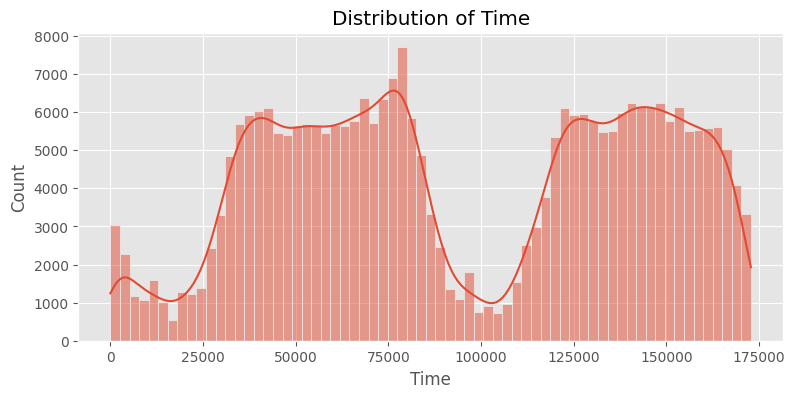

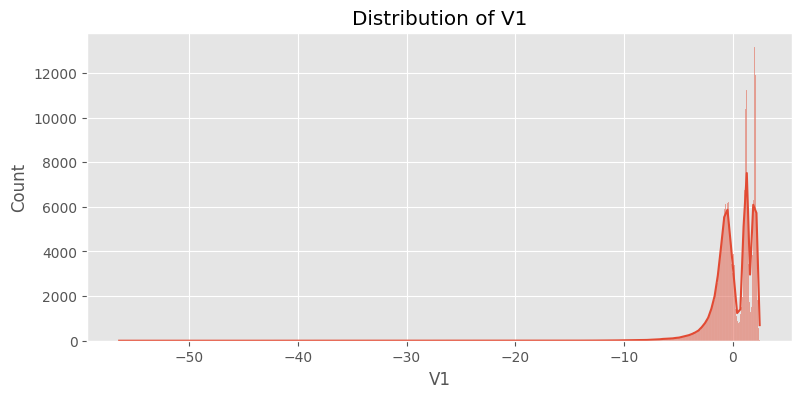

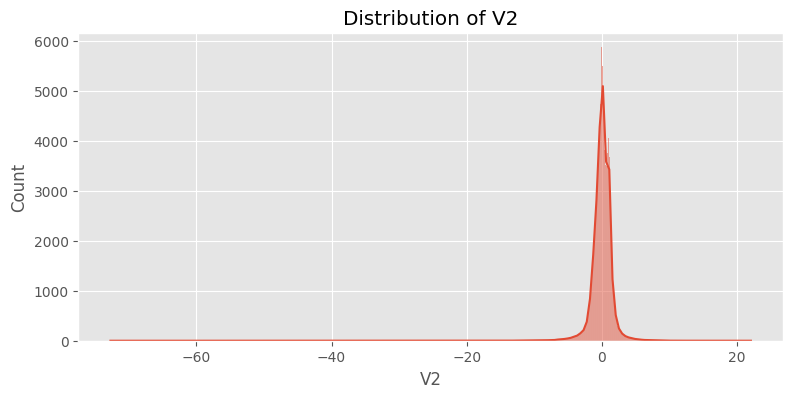

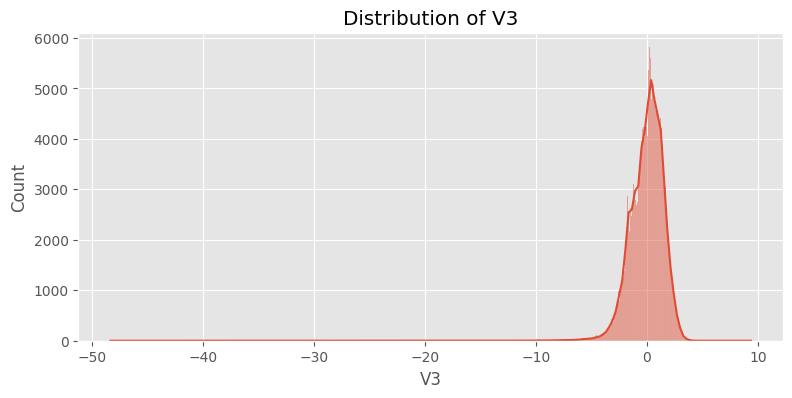

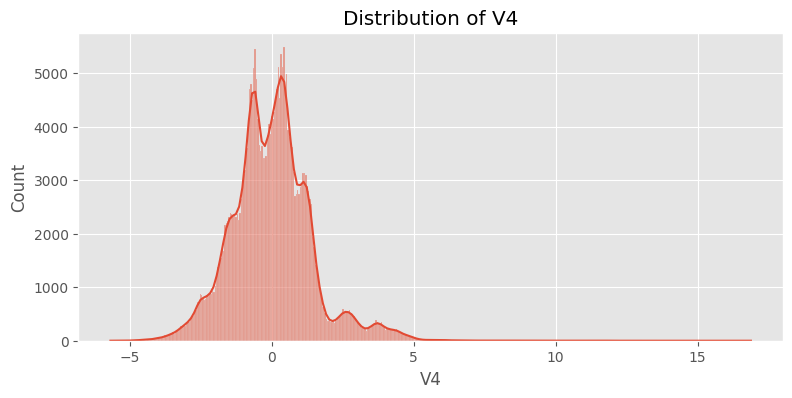

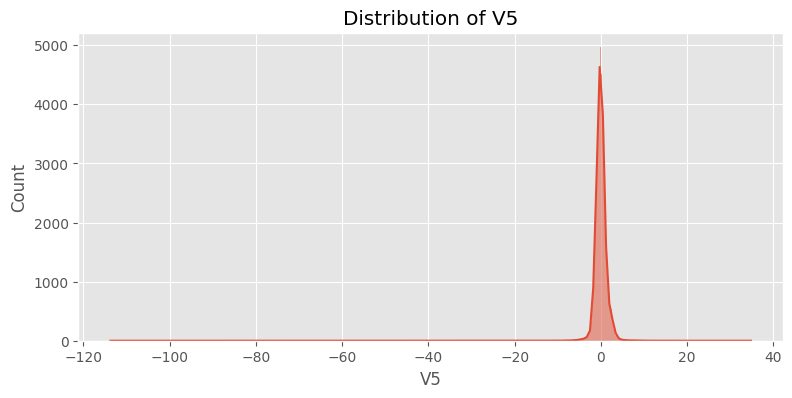

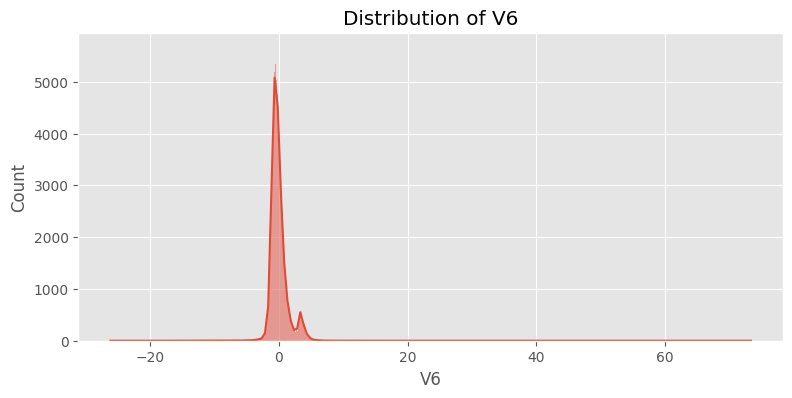

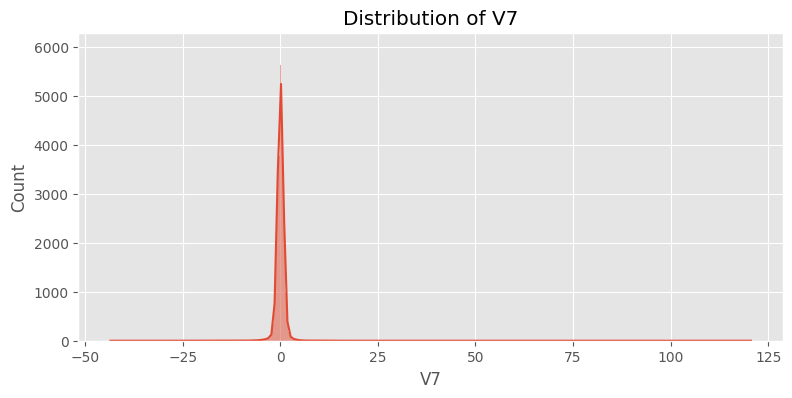

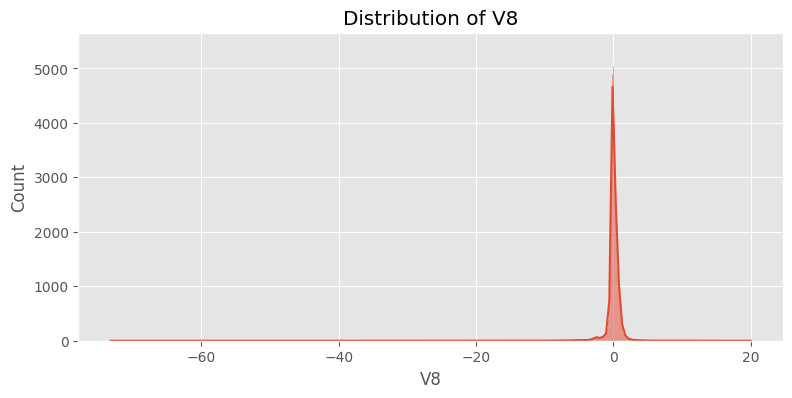

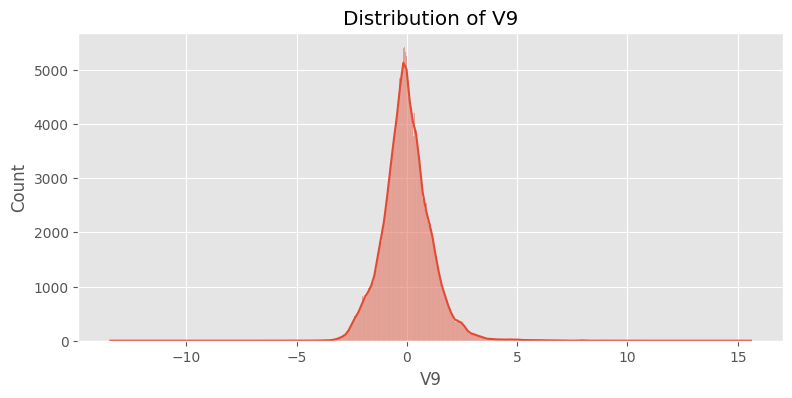

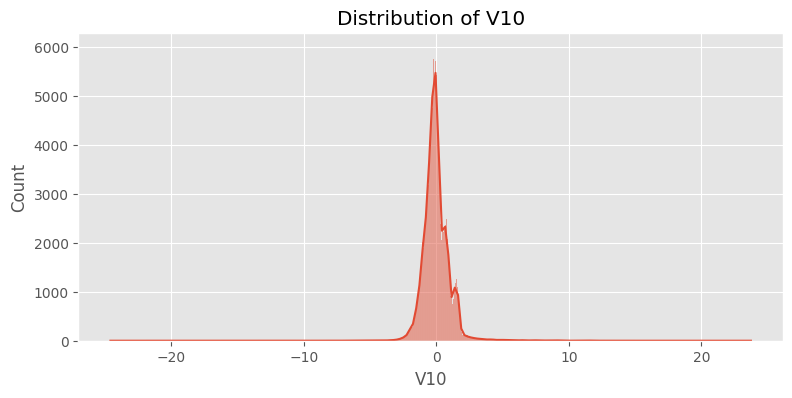

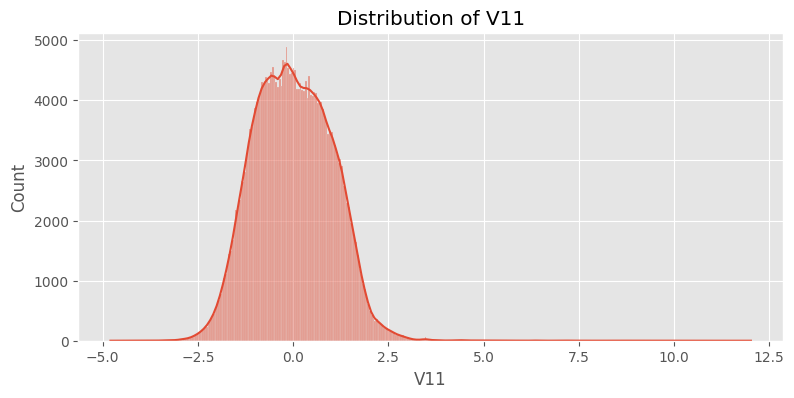

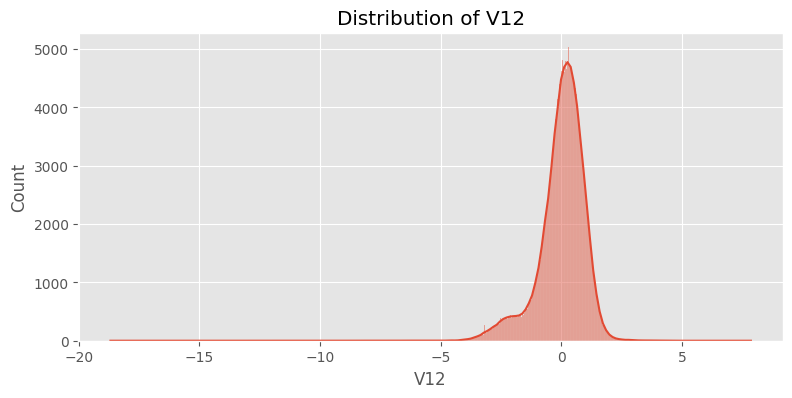

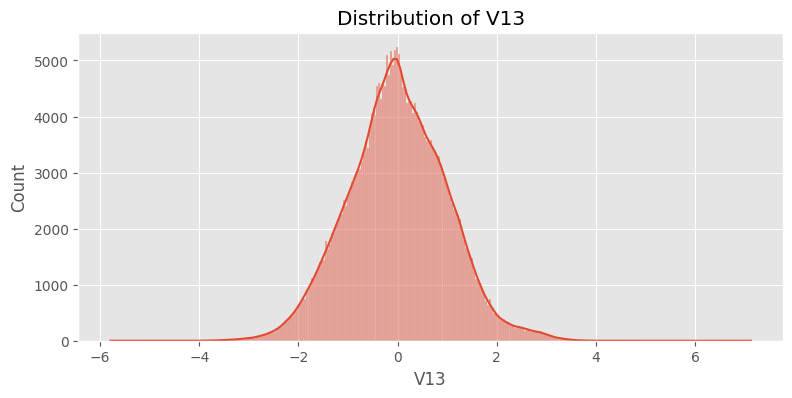

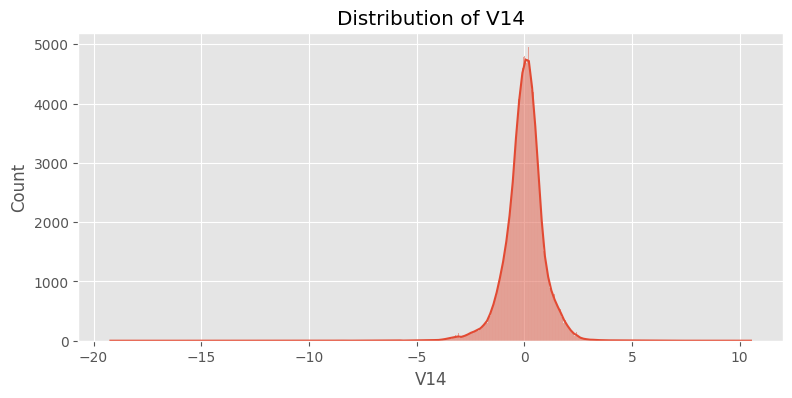

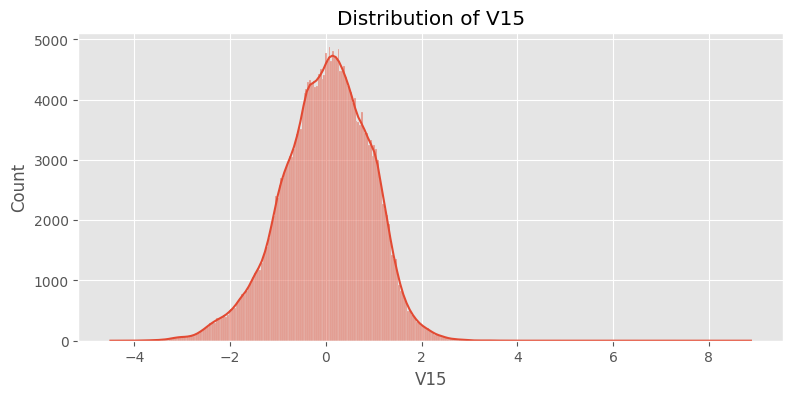

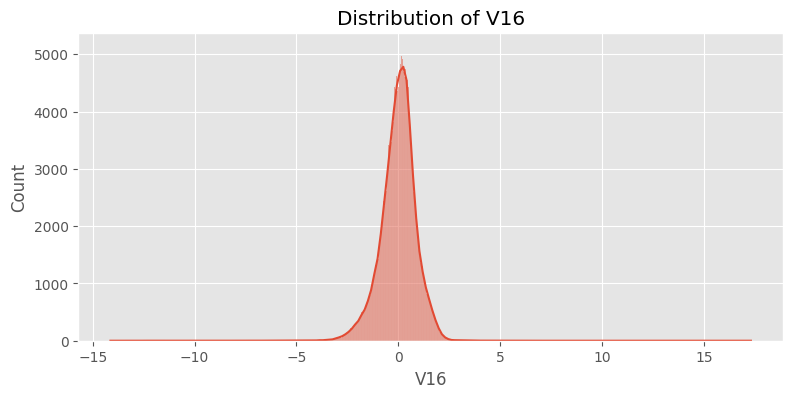

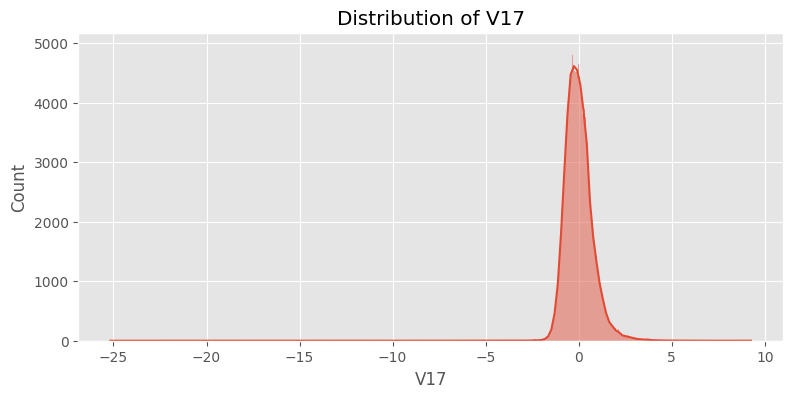

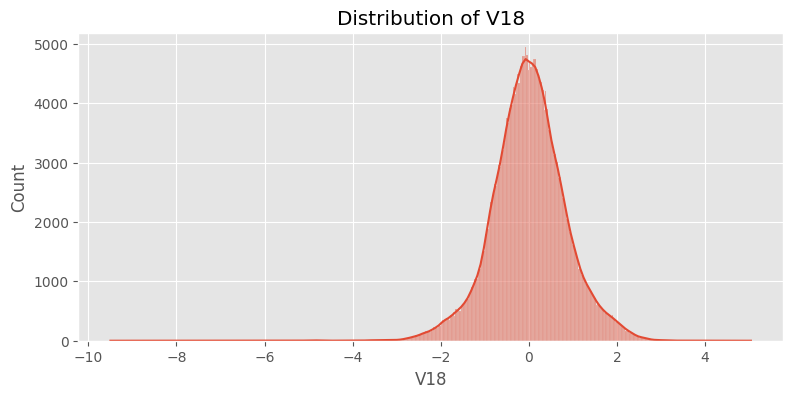

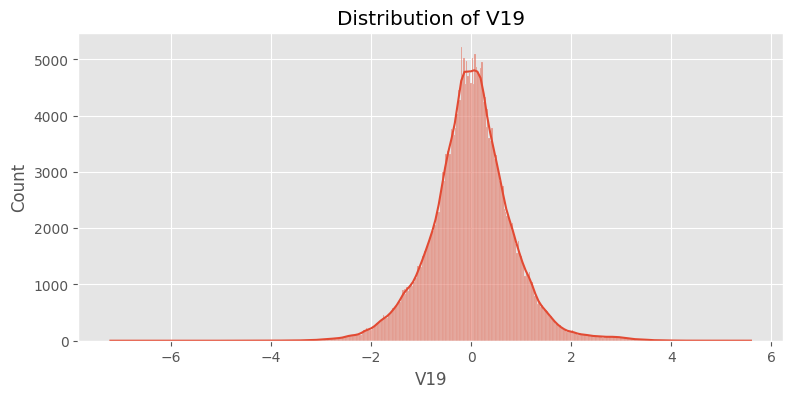

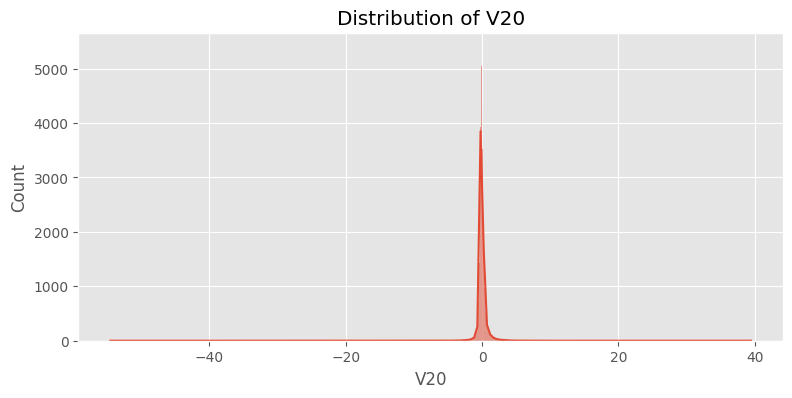

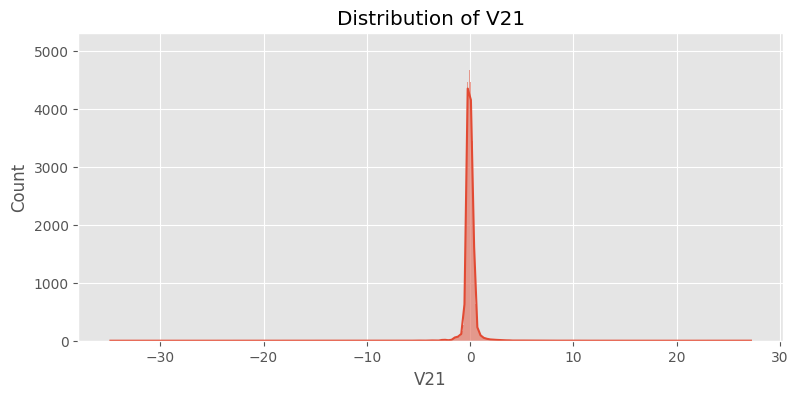

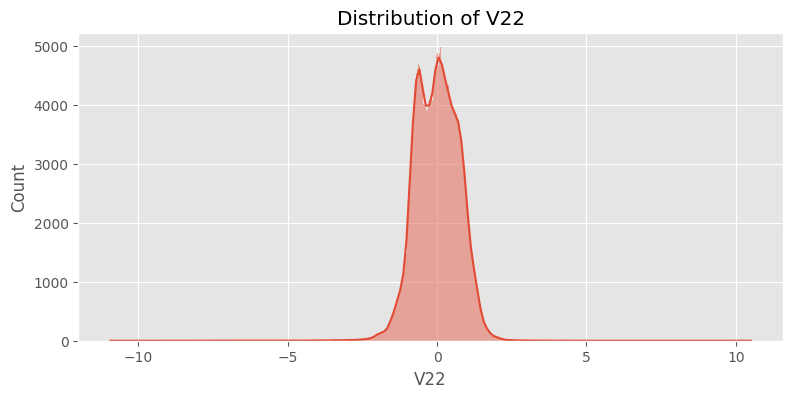

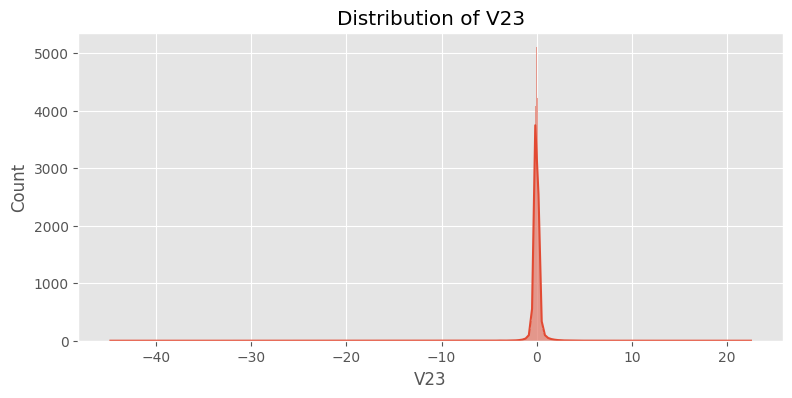

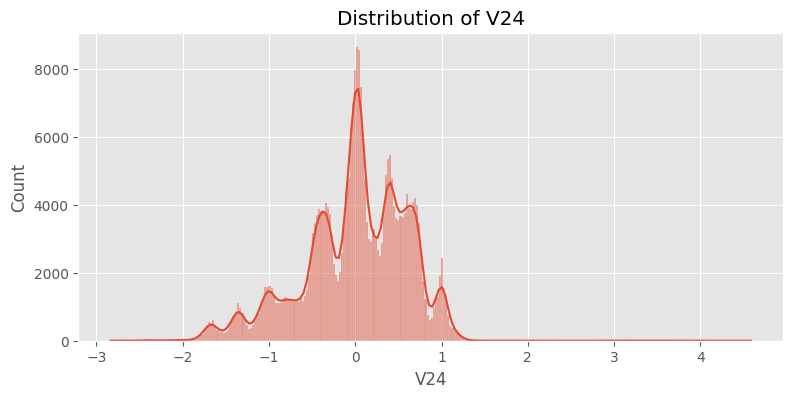

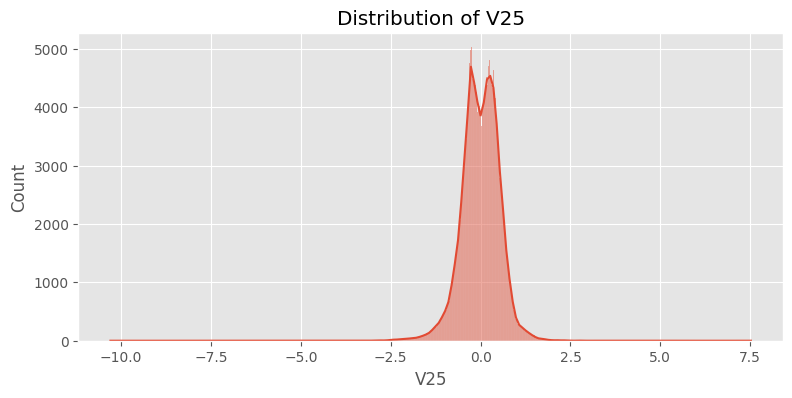

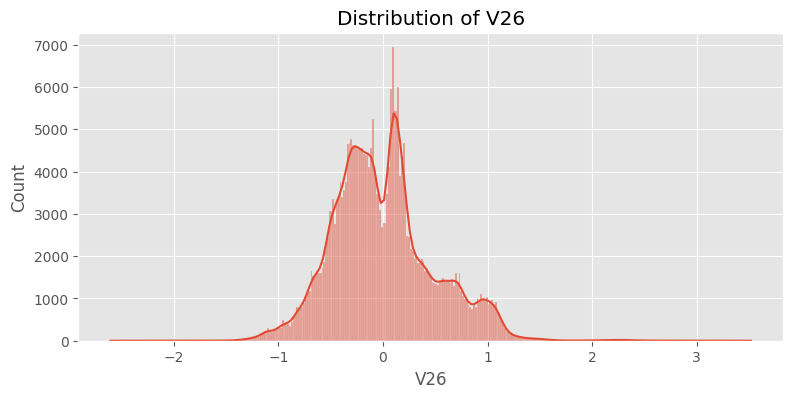

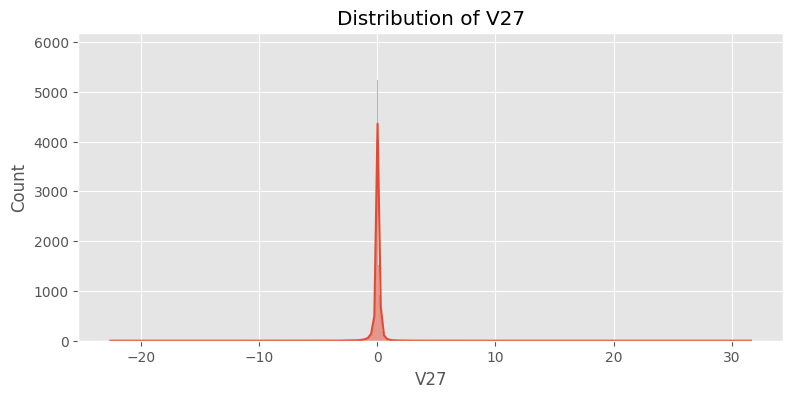

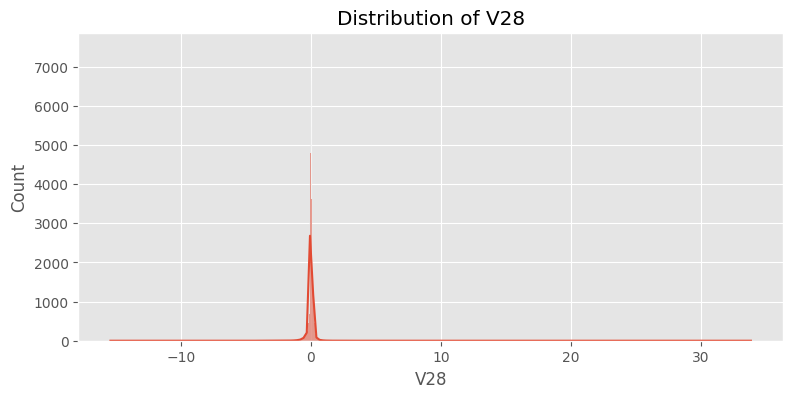

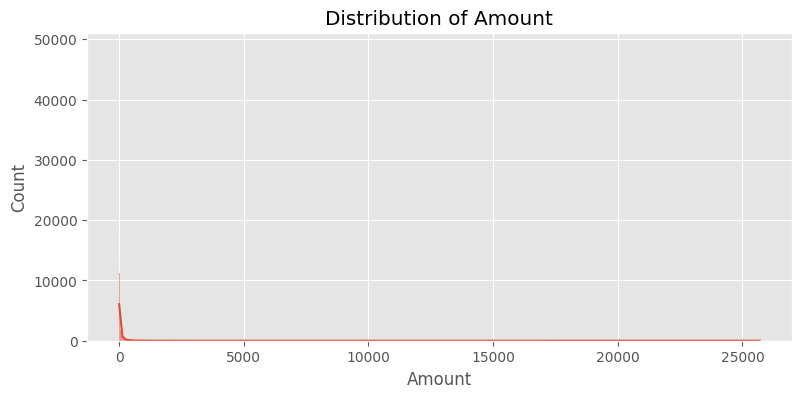

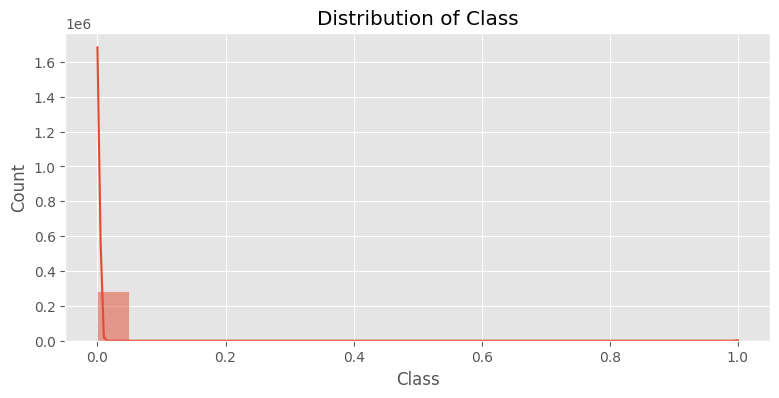

In [28]:
#plot histograms for numerical variables
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde = True)
    plt.title(f'Distribution of {column}')
    plt.show()

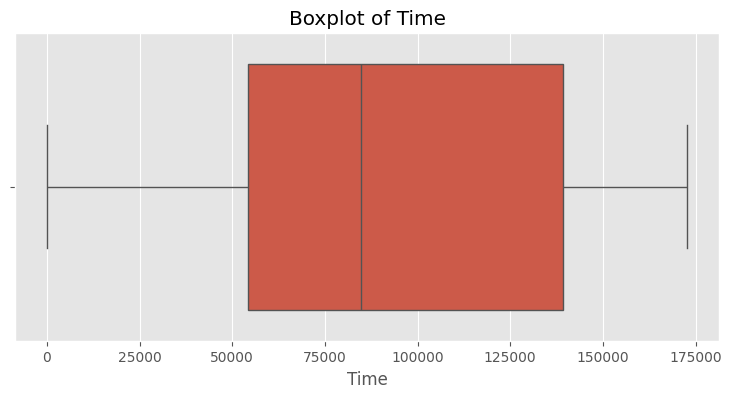

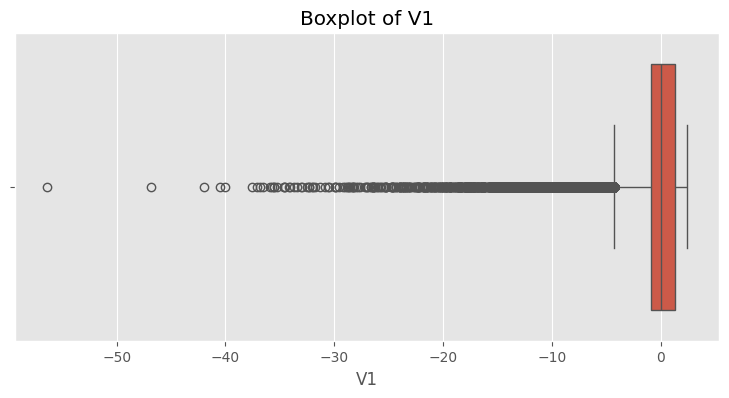

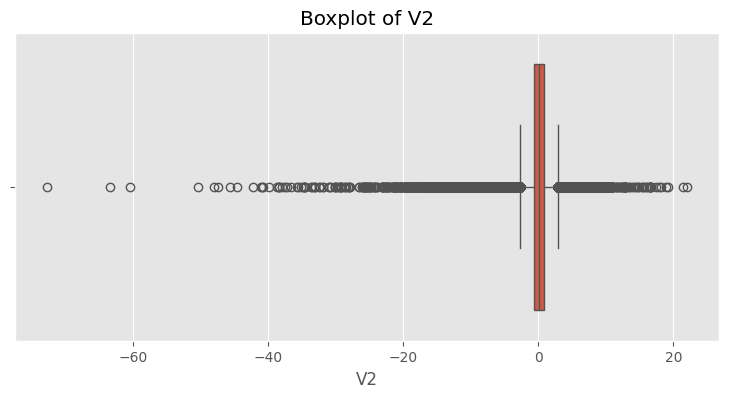

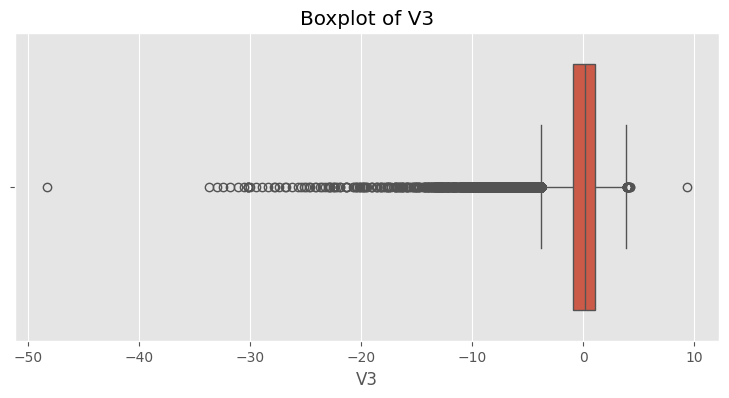

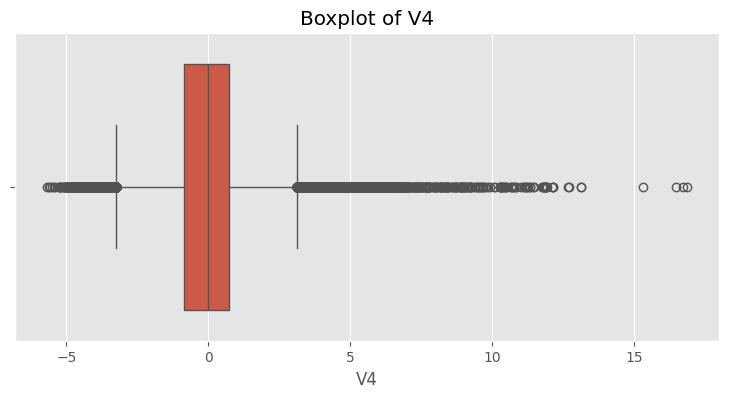

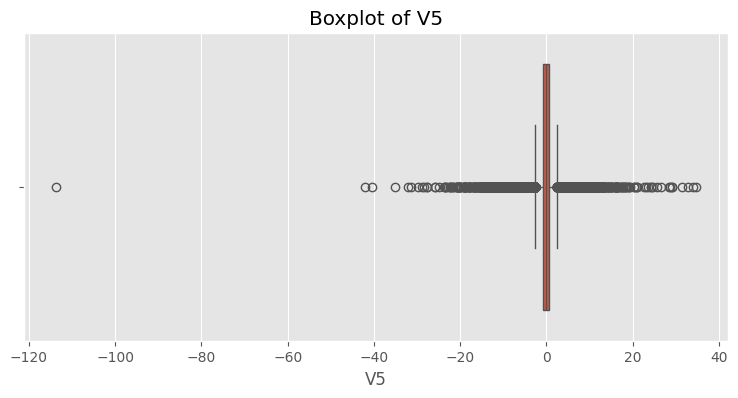

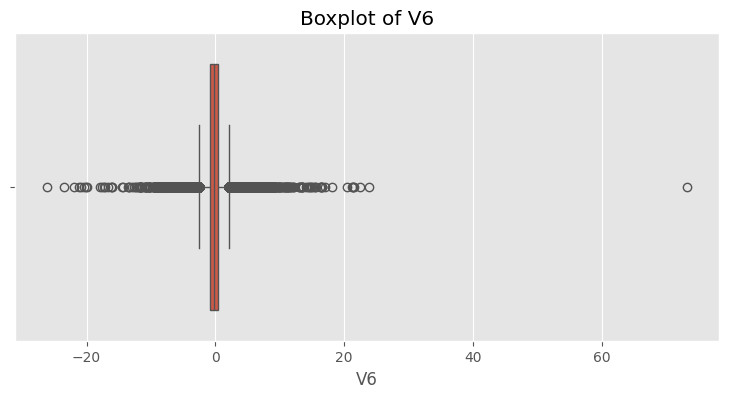

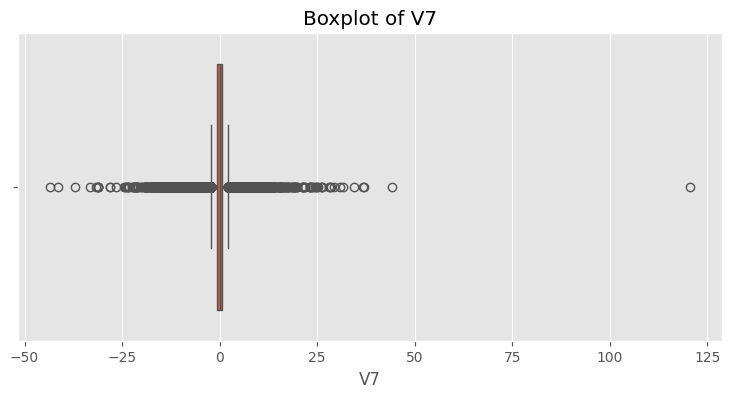

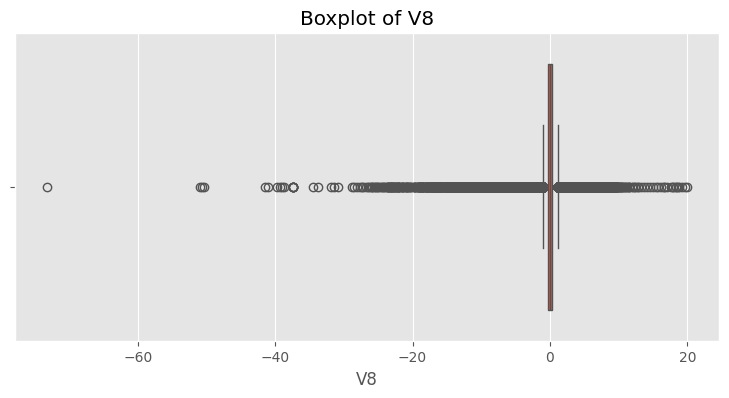

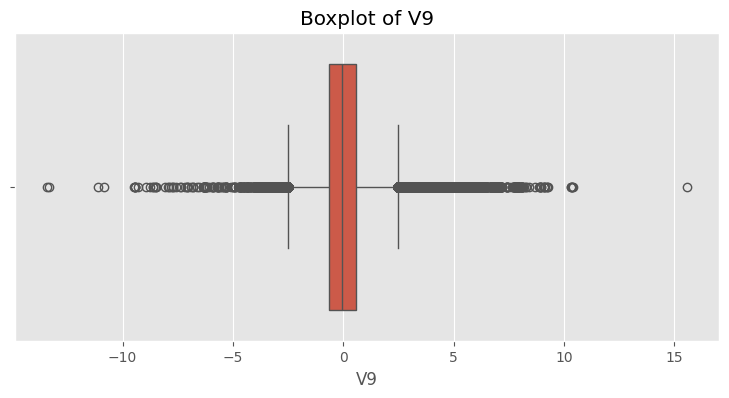

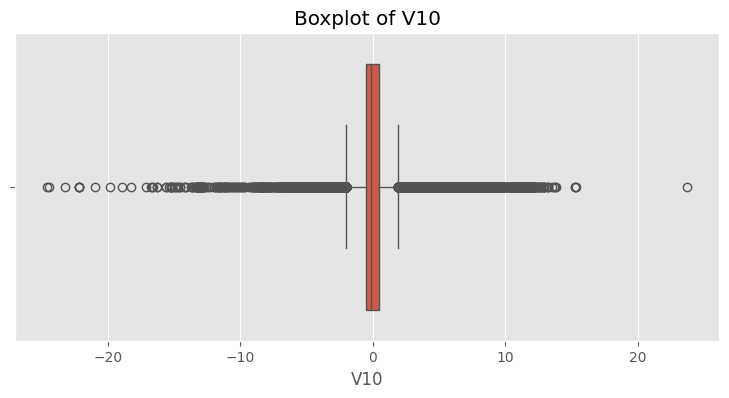

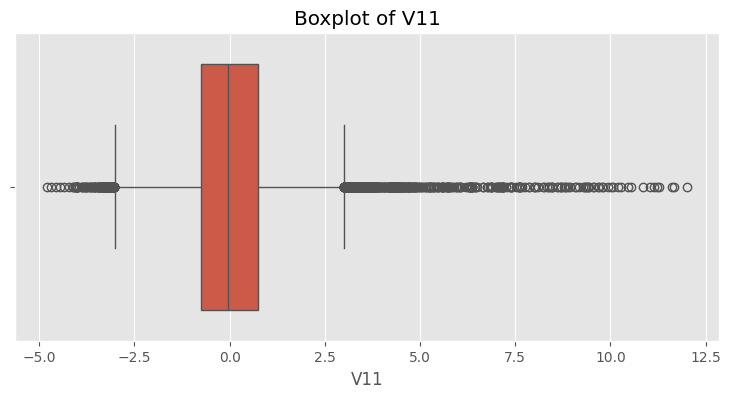

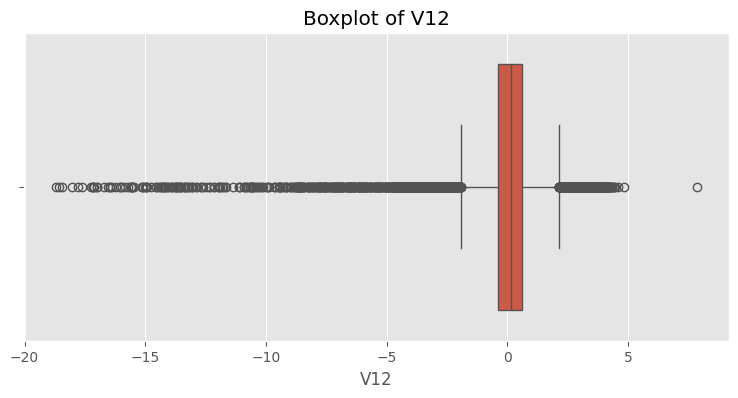

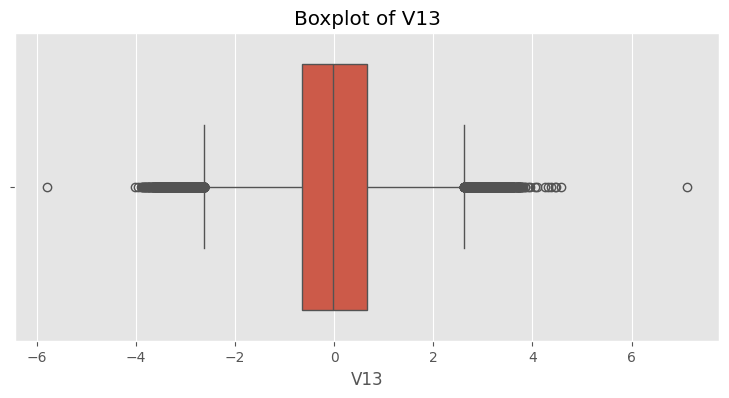

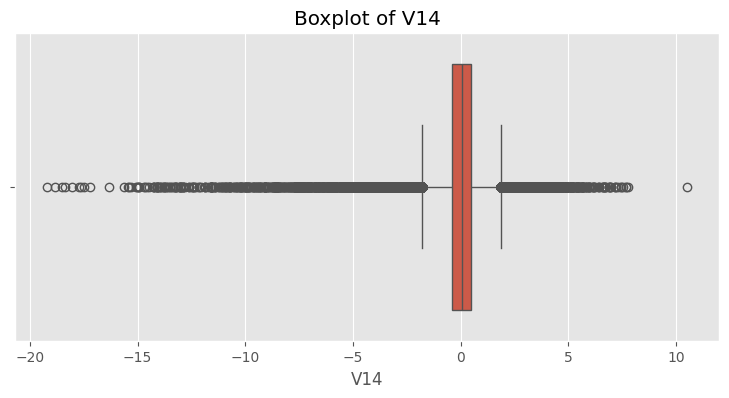

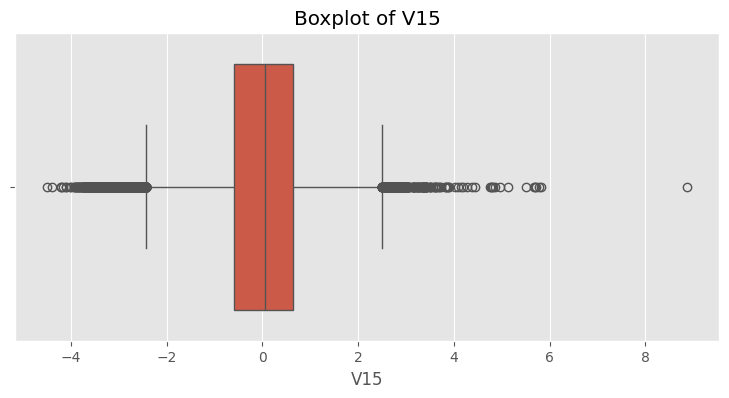

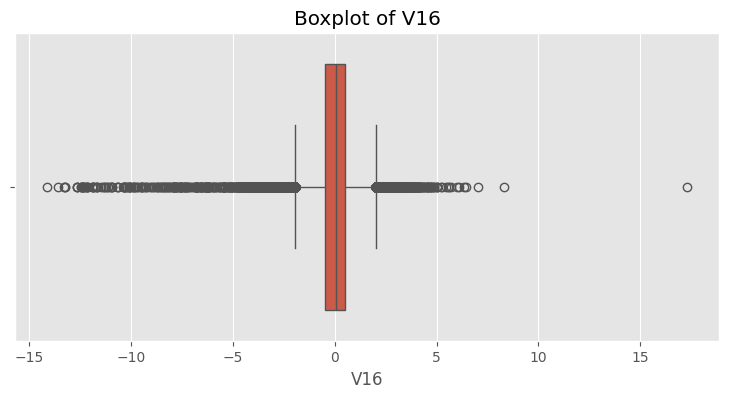

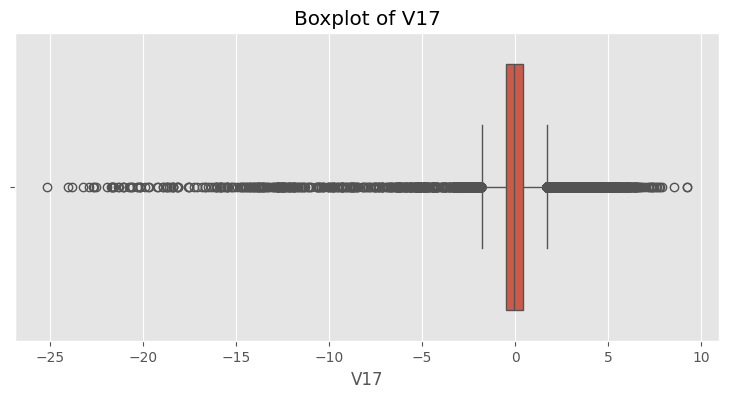

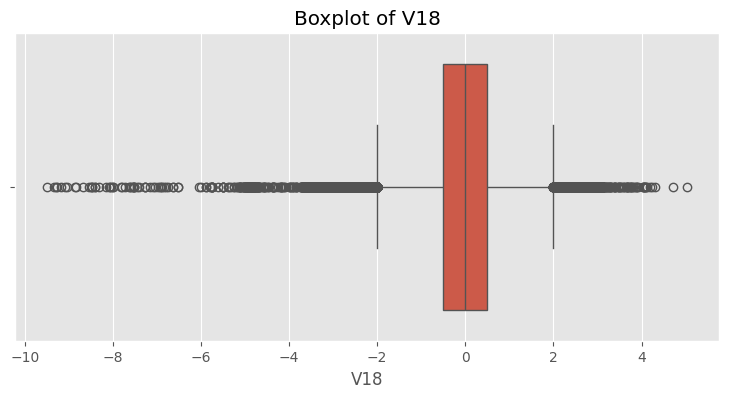

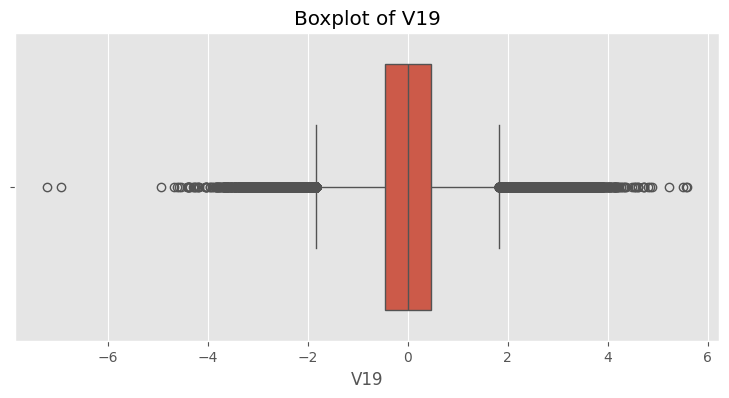

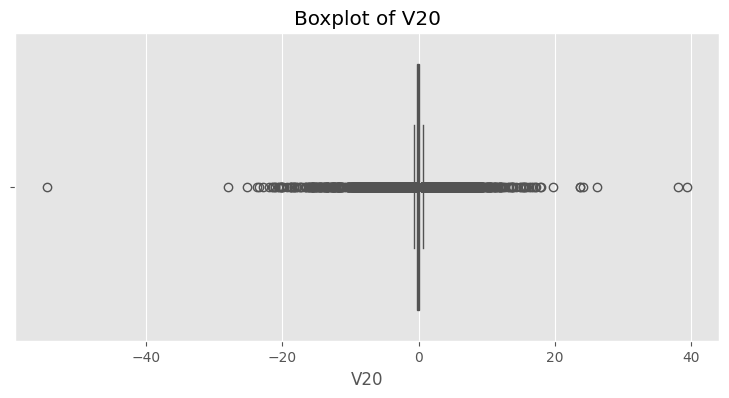

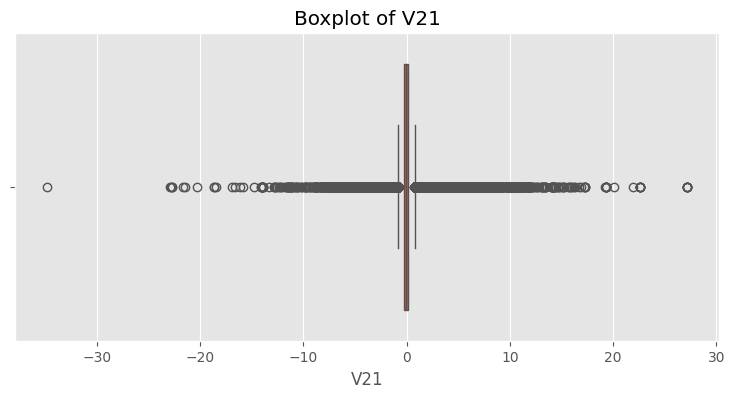

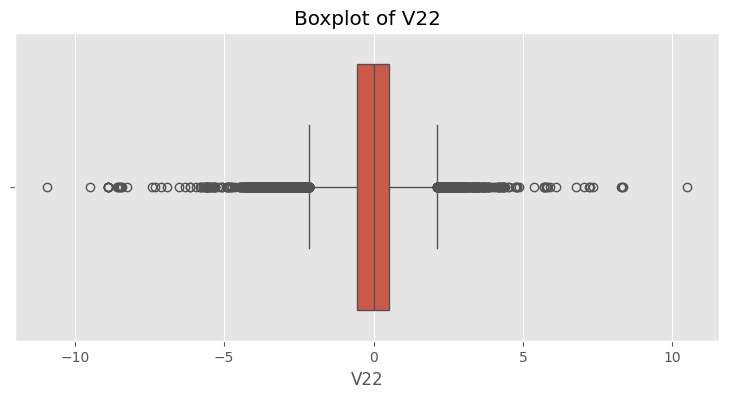

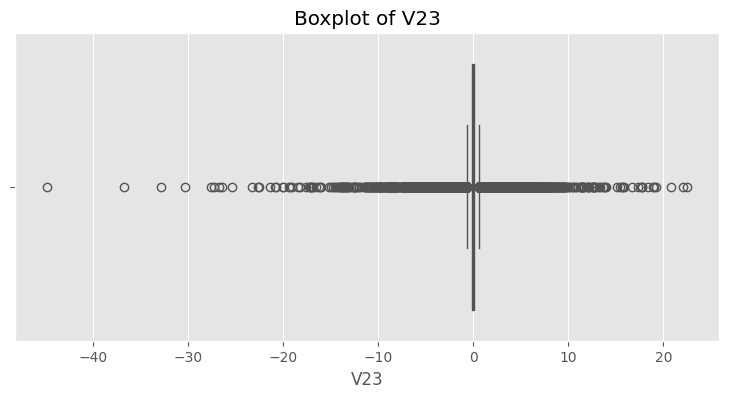

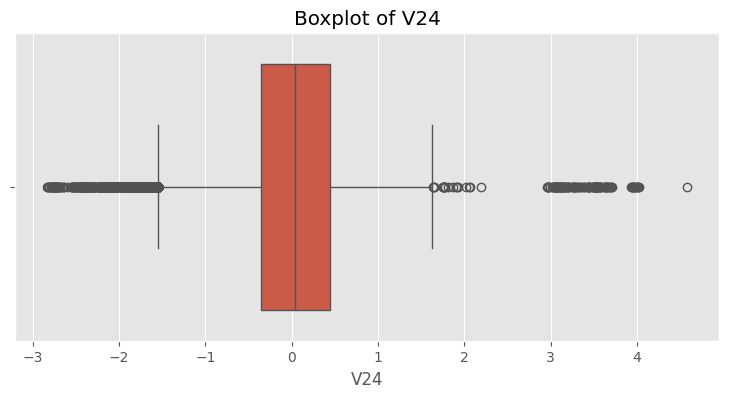

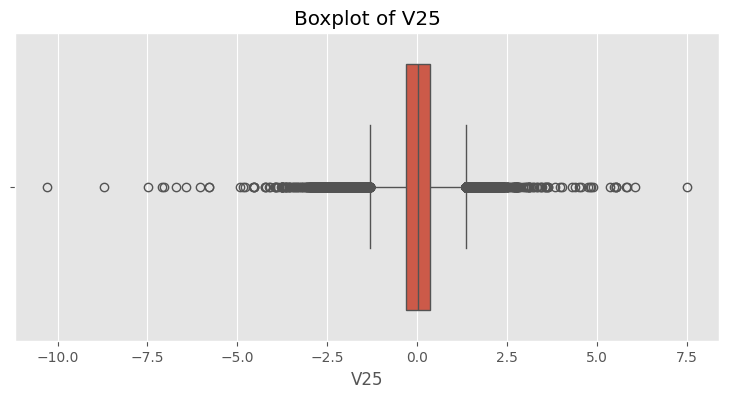

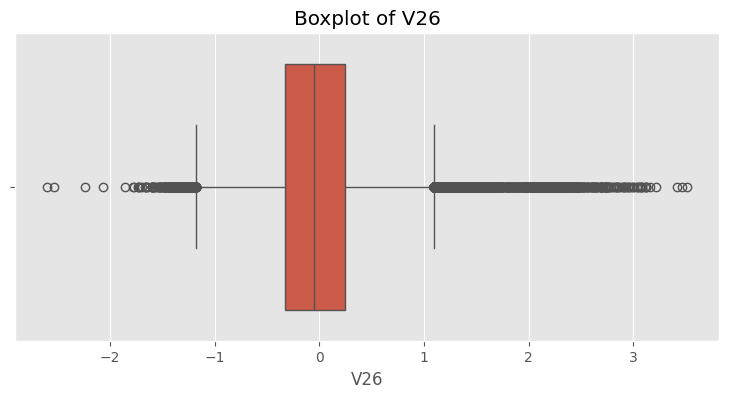

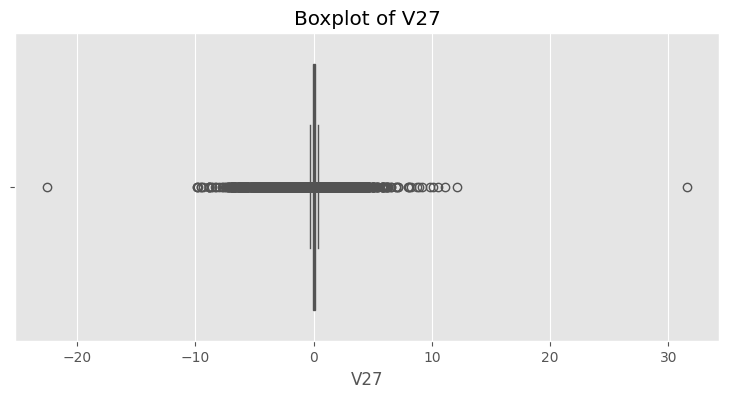

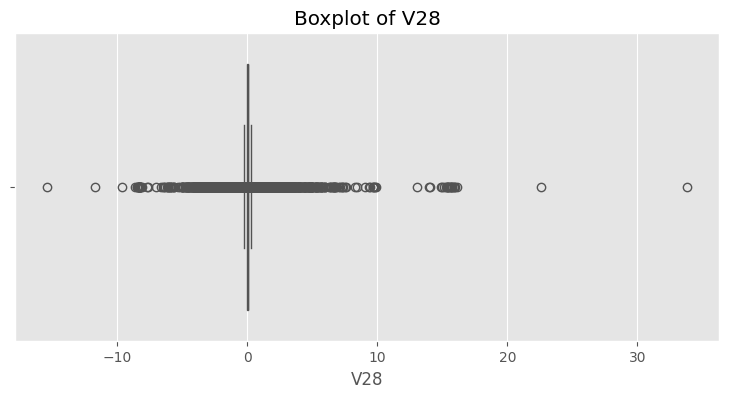

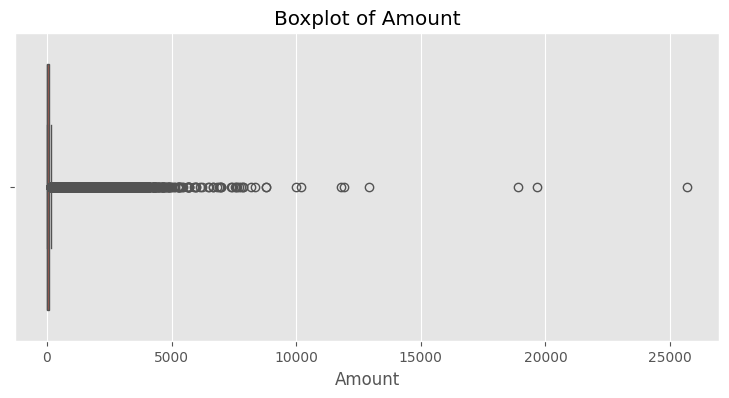

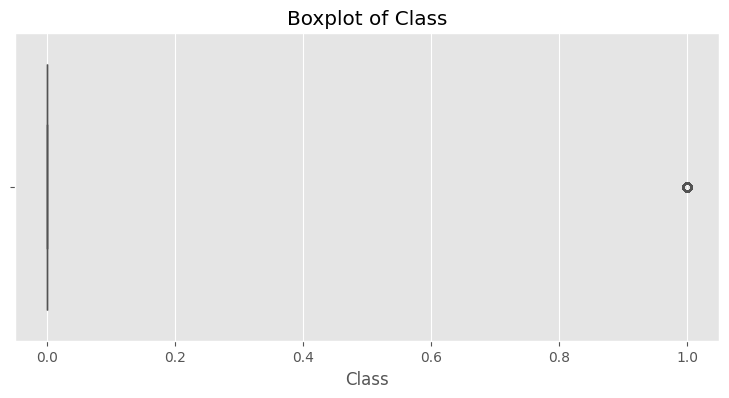

In [29]:
#plot boxplots of all continuous features
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Multivariate Analysis

## Correlations

In [30]:
#correlations
corr_matrix = df[filter_conf].corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,-0.009,...,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011,-0.012
V1,0.117,1.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.228,-0.101
V2,-0.011,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.531,0.091
V3,-0.420,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,...,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.211,-0.193
V4,-0.105,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.099,0.133
V5,0.173,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,0.000,...,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.386,-0.095
V6,-0.063,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,...,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.216,-0.044
V7,0.085,-0.000,0.000,0.000,-0.000,0.000,0.000,1.000,0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.397,-0.187
V8,-0.037,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.103,0.020
V9,-0.009,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.044,-0.098


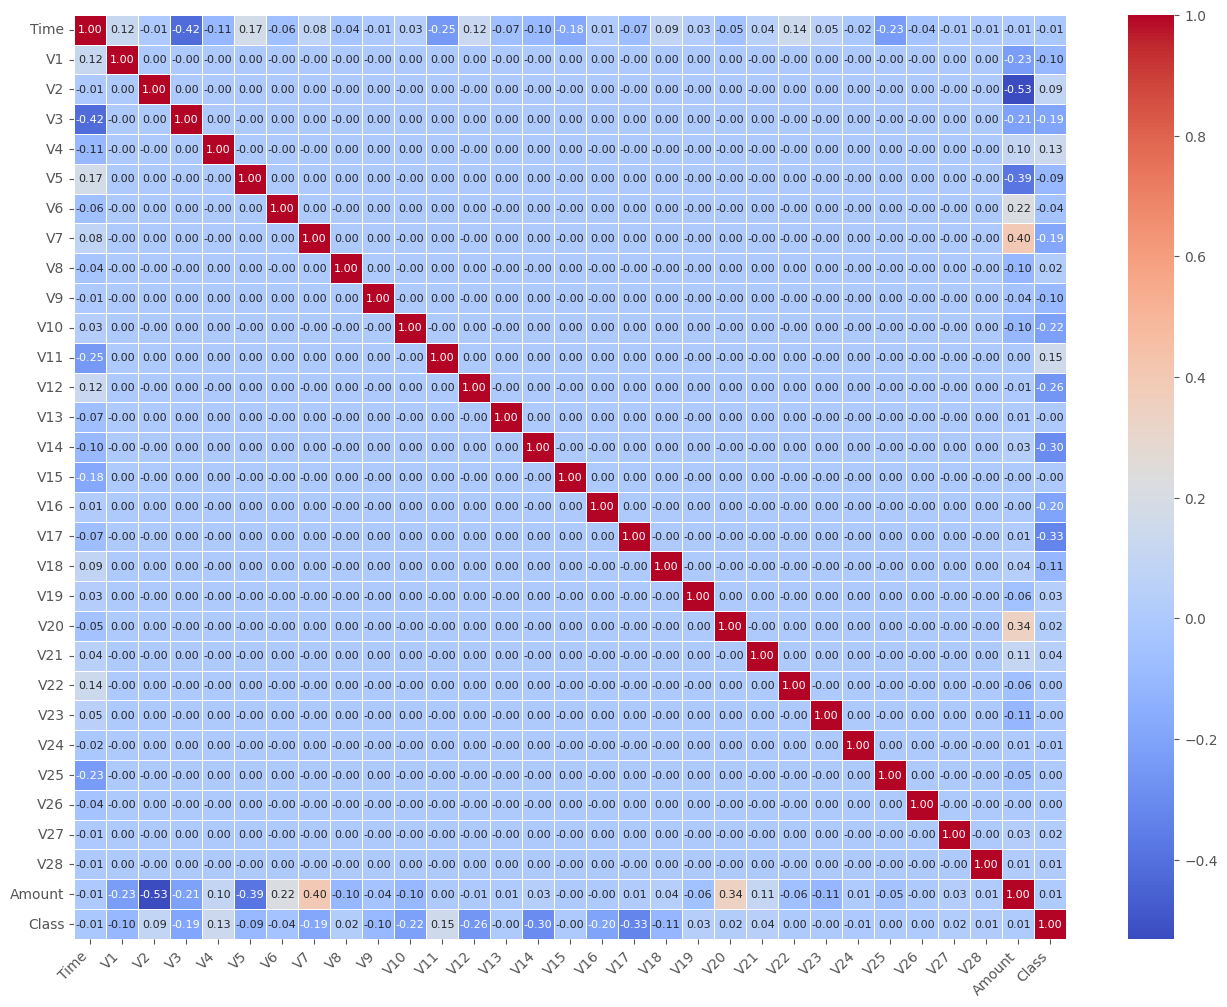

In [31]:
# Create a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()

In [41]:
#filter to correlation threshold
target_column = 'Class'
corr_with_target = df.corr()[target_column].abs() #get the absolute value of features correlation to target variable
threshold = .03 #set the threshold for correlation
high_corr = corr_with_target[corr_with_target > threshold].index.tolist() #gets the list of features that meet threshold
print(high_corr)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class']


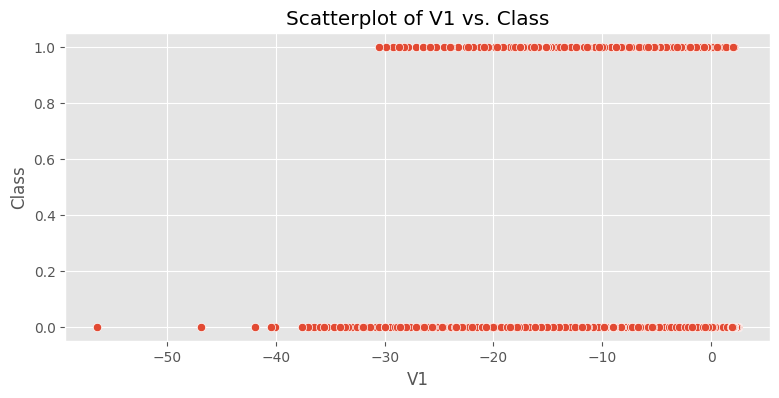

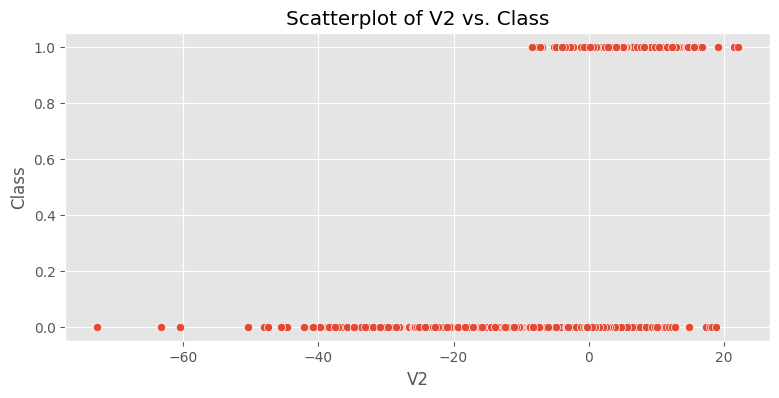

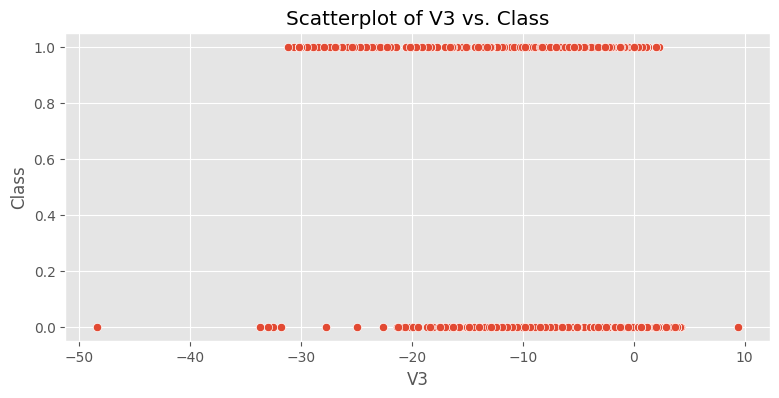

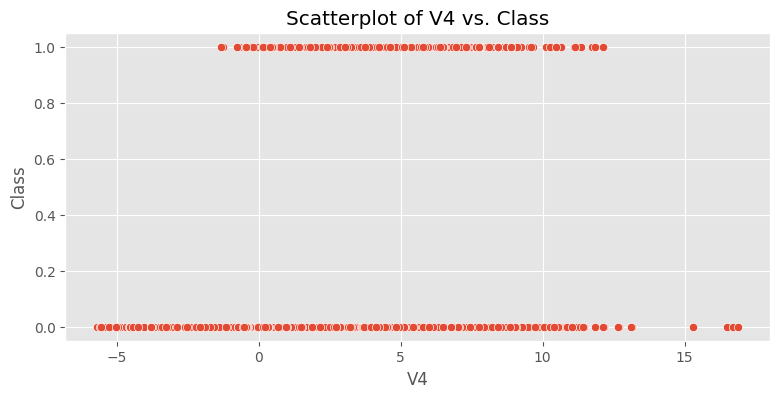

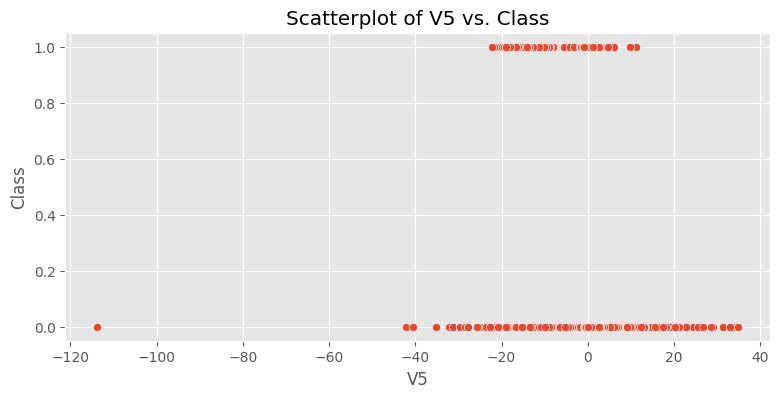

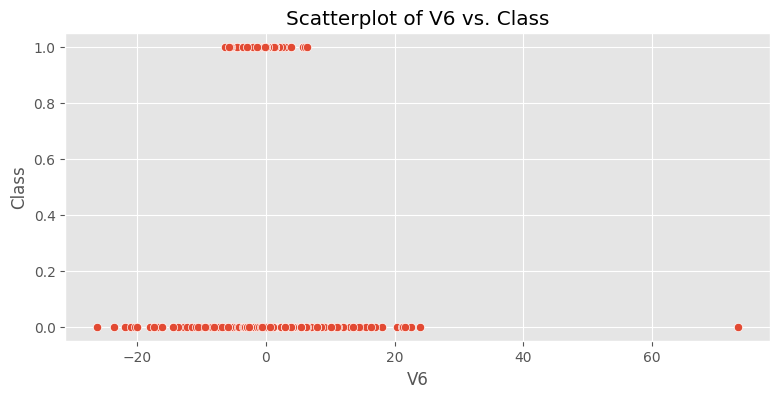

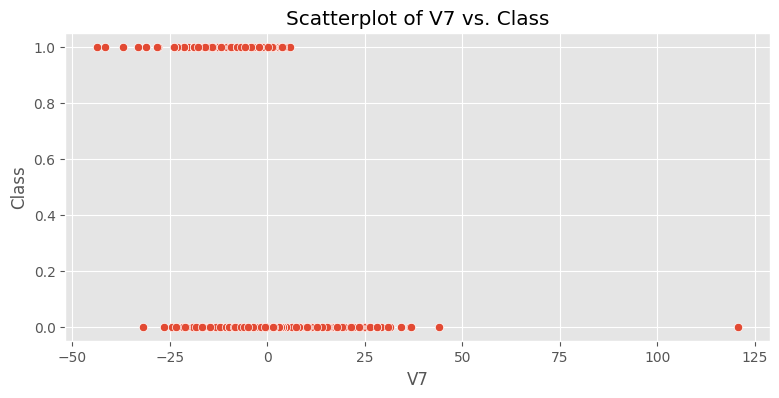

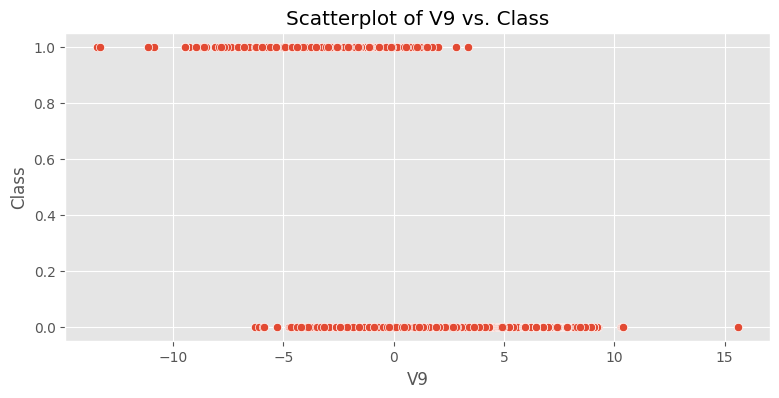

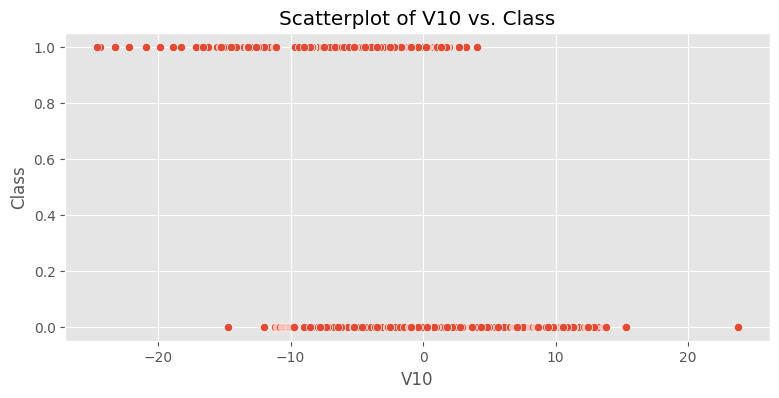

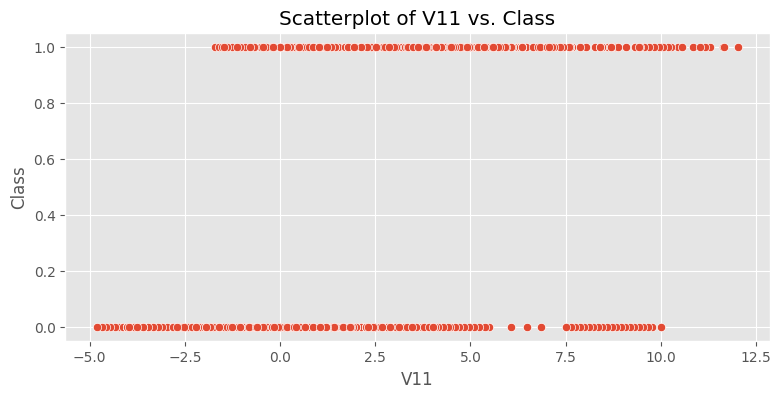

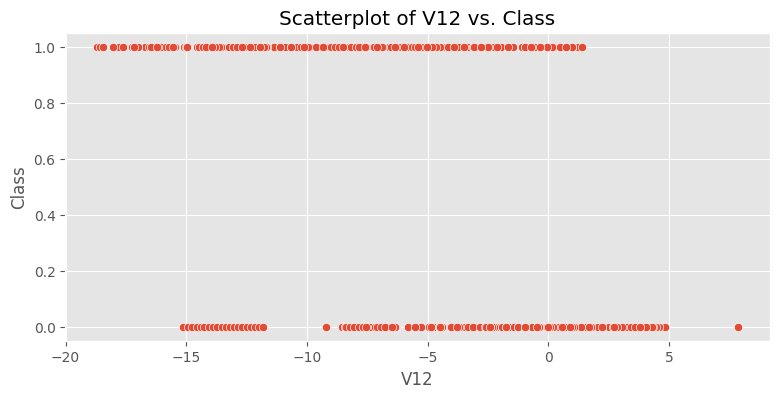

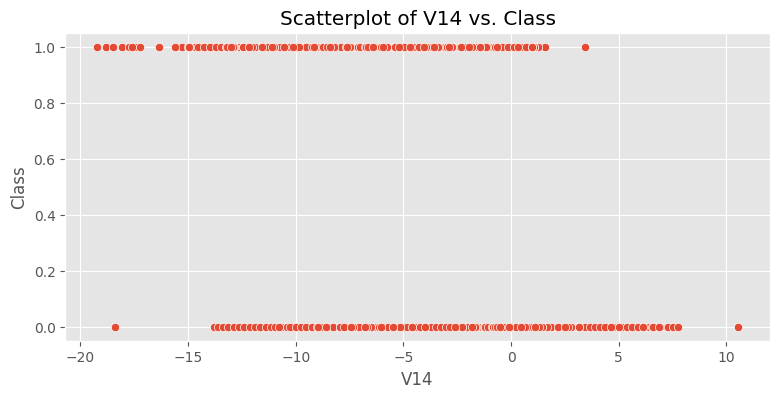

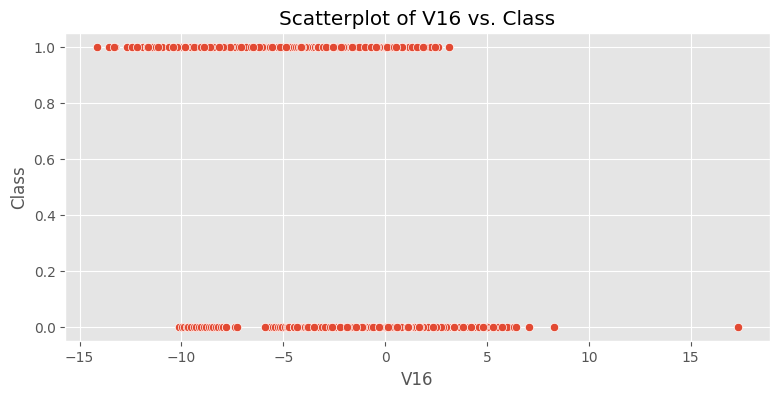

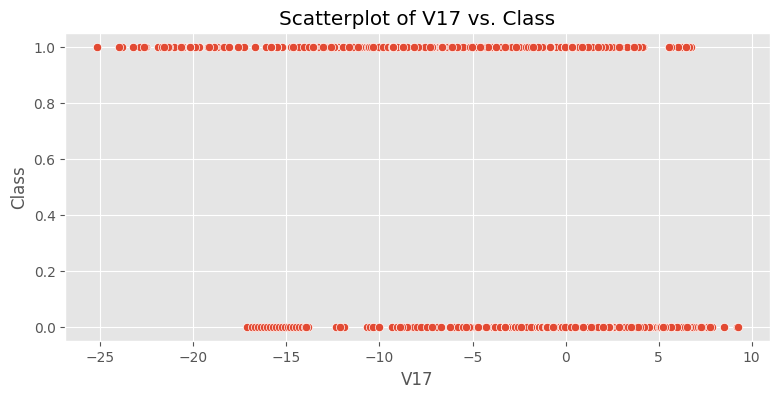

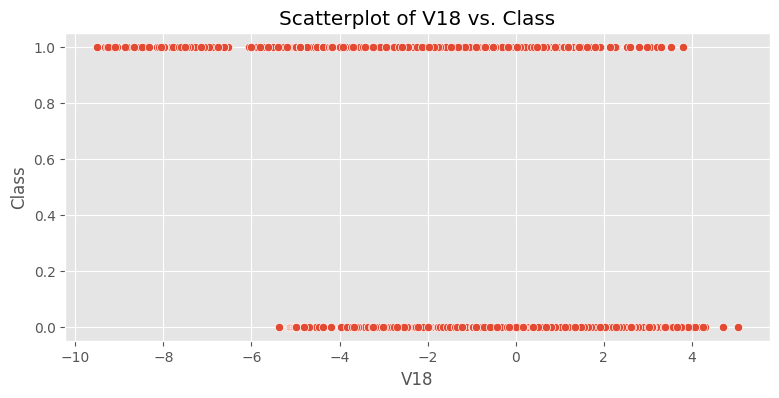

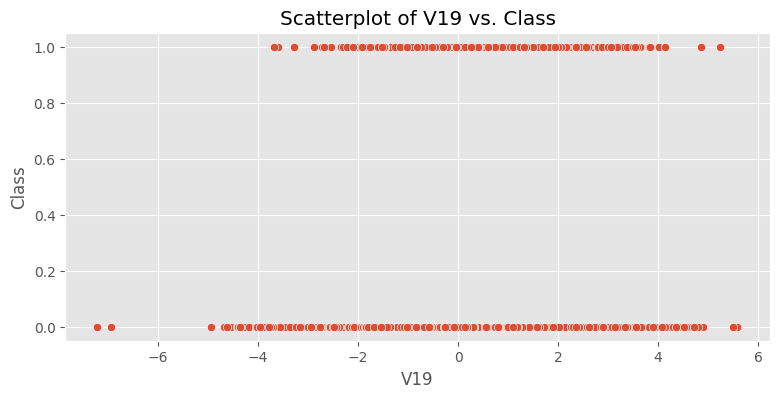

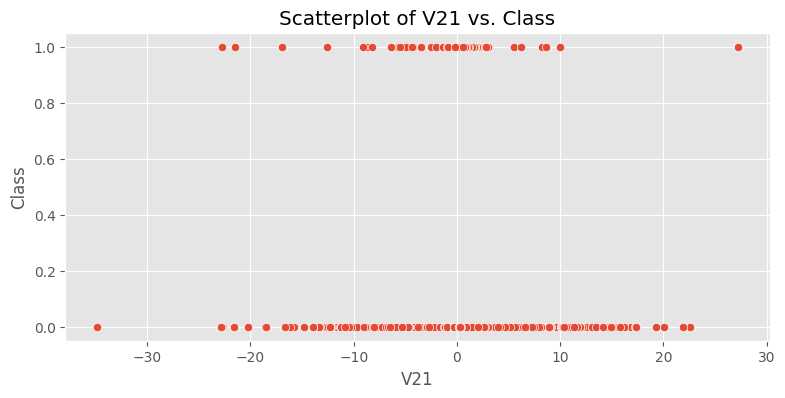

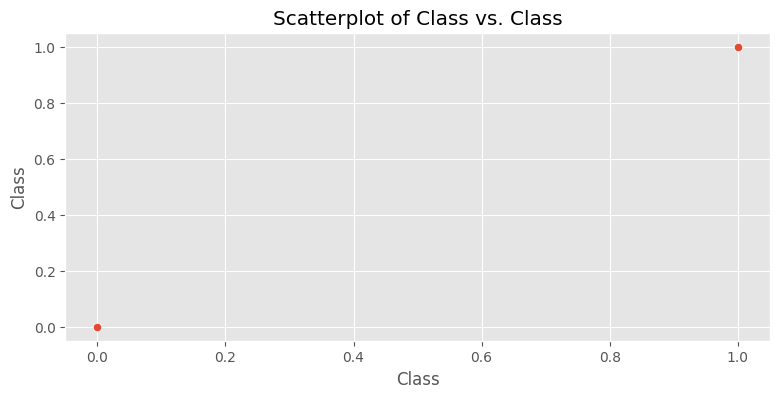

In [42]:
#plot scatterplots for threshold meeting the correlation
plt.style.use('ggplot')
for column in high_corr:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[column], y=df['Class'])
    plt.title(f'Scatterplot of {column} vs. Class')
    plt.show()

In [ ]:
sns.pairplot(df[high_corr], hue='Class')

KeyboardInterrupt: 